In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def mean_filtered(image, filter_size):
    kernel = np.ones((filter_size, filter_size), np.float32) / (filter_size * filter_size)
    height, width = image.shape
    mean_filtered_image = np.zeros((height, width), np.float32)
    padded_image = cv2.copyMakeBorder(image, filter_size//2, filter_size//2, filter_size//2, filter_size//2, cv2.BORDER_REFLECT)
    
    for i in range(height):
        for j in range(width):
            mean_filtered_image[i, j] = np.sum(padded_image[i:i+filter_size, j:j+filter_size] * kernel)
    
    return np.clip(mean_filtered_image, 0, 255).astype(np.uint8)

In [24]:
image_color = cv2.imread("ulyaaa.jpg")

In [25]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
median_filtered = cv2.medianBlur(image_color, 3)
mean_filtered = mean_filtered(image_gray, 3)

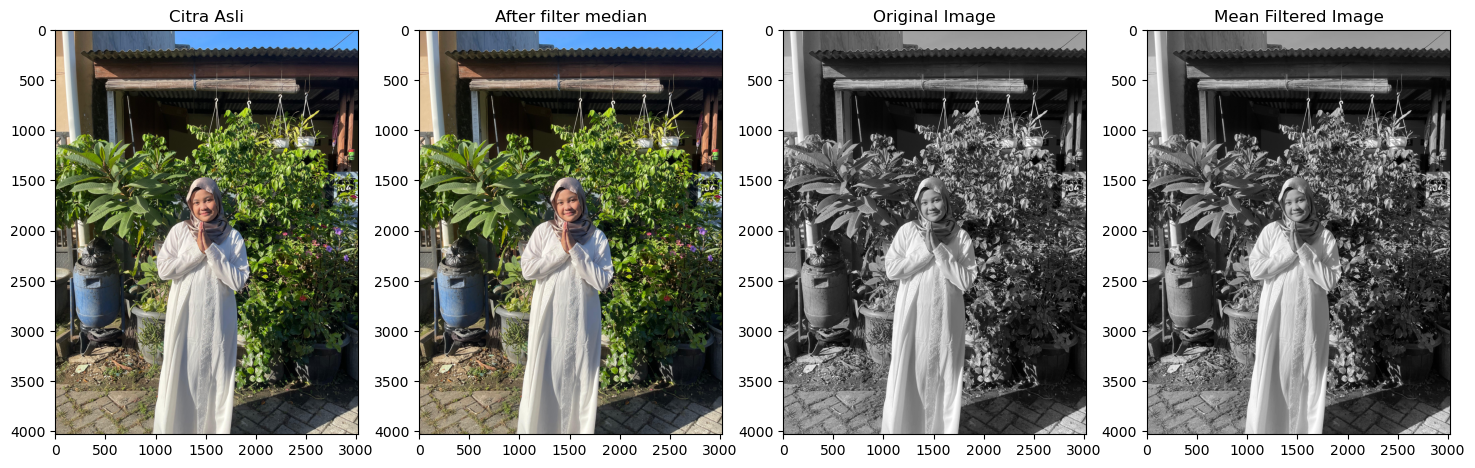

In [26]:
plt.figure(figsize=(18, 18))
plt.subplot(141), plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)), plt.title('Citra Asli')
plt.subplot(142), plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB)), plt.title('After filter median')
plt.subplot(143), plt.imshow(image_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(144), plt.imshow(mean_filtered, cmap='gray'), plt.title('Mean Filtered Image')
plt.show()